In [ ]:
from google.colab import drive
drive.flush_and_unmount()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/DexiNed-master

/content/drive/MyDrive/Colab Notebooks/DexiNed-master


In [4]:
!ls

checkpoints		      DexiNed-TF2	losses.py	  README.md
data			      dexi_utils.py	main_original.py  result
DATA_502_Final_Project.ipynb  enhanced_results	main.py		  utils
datasets_original.py	      figs		main_V1.py
datasets.py		      legacy		model.py
datasets_V1.py		      LICENSE		__pycache__


In [5]:
pip install kornia

     |████████████████████████████████| 401 kB 7.8 MB/s 


In [6]:
pip install opencv-python

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn

import torchvision
import torchvision.transforms as transforms

import os
import argparse
from torchvision.utils import save_image 
from PIL import Image
convert_tensor = transforms.ToTensor()


import cv2

In [ ]:
for dset_name in ['CIFAR100']:
  for dset_type in ['train','test']:
    src_path = './data/'+dset_name
    trg_path = './result/BIPED2CLASSIC/'+dset_name
    enh_res_path = './enhanced_results/'+dset_name
    if not os.path.exists(src_path+'/'+dset_type):
      os.makedirs(src_path+'/'+dset_type)


    if not os.path.exists(trg_path+'/'+dset_type):
      os.makedirs(trg_path+'/'+dset_type)



    if not os.path.exists(enh_res_path+'/'+dset_type):
      os.makedirs(enh_res_path+'/'+dset_type)

    #transform_train = transforms.Compose([
    #transforms.RandomCrop(32, padding=4),
    #transforms.RandomHorizontalFlip(),
    #transforms.ToTensor(),
    #transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),])

    #transform_test = transforms.Compose([
    #transforms.ToTensor(),
    #transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),])

    transform_train = transforms.Compose([transforms.ToTensor(),])


    func = "torchvision.datasets."+dset_name

    if dset_type == 'train':
      testset = eval(func)(
      root=src_path+'/'+dset_type, train=True, download=True, transform=transform_train)
    
      testloader = torch.utils.data.DataLoader(
      testset, batch_size=1, shuffle=False, num_workers=16)

    if dset_type == 'test':
      testset = eval(func)(
      root=src_path+'/'+dset_type, train=False, download=True, transform=transform_train)
    
      testloader = torch.utils.data.DataLoader(
      testset, batch_size=1, shuffle=False, num_workers=16)


    with torch.no_grad():
      n=0
      for batch_idx, (inputs, targets) in enumerate(testloader):
        save_image(inputs, src_path+'/'+dset_type+'/'+str(n)+'.png')
        #print(targets)
        torch.save(targets, src_path+'/'+dset_type+'/'+str(n)+'label.pt')
        n += 1     

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/CIFAR10/test/cifar-10-python.tar.gz to ./data/CIFAR10/test


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
!python main.py --choose_test_data=-1 --src_dir='CIFAR10/train'

Streaming output truncated to the last 5000 lines.
actual size: (32, 32, 3), target size: (512, 512)
input tensor shape: torch.Size([1, 3, 512, 512])
actual size: (32, 32, 3), target size: (512, 512)
input tensor shape: torch.Size([1, 3, 512, 512])
actual size: (32, 32, 3), target size: (512, 512)
input tensor shape: torch.Size([1, 3, 512, 512])
actual size: (32, 32, 3), target size: (512, 512)
input tensor shape: torch.Size([1, 3, 512, 512])
actual size: (32, 32, 3), target size: (512, 512)
input tensor shape: torch.Size([1, 3, 512, 512])
actual size: (32, 32, 3), target size: (512, 512)
input tensor shape: torch.Size([1, 3, 512, 512])
actual size: (32, 32, 3), target size: (512, 512)
input tensor shape: torch.Size([1, 3, 512, 512])
actual size: (32, 32, 3), target size: (512, 512)
input tensor shape: torch.Size([1, 3, 512, 512])
actual size: (32, 32, 3), target size: (512, 512)
input tensor shape: torch.Size([1, 3, 512, 512])
actual size: (32, 32, 3), target size: (512, 512)
input te

In [ ]:
!python main.py --choose_test_data=-1 --src_dir='CIFAR10/test'

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/DexiNed-master

/content/drive/MyDrive/Colab Notebooks/DexiNed-master


In [ ]:
dset_name = 'CIFAR10'
dset_type = 'train'
src_path = './data/'+dset_name
trg_path = './result/BIPED2CLASSIC/'+dset_name
enh_res_train_path = './enhanced_results/'+dset_name+'/'+dset_type

Edge_Image_train_Path = trg_path+'/'+dset_type+'/avg'
Edge_images_list_train = os.listdir(Edge_Image_train_Path)

Orig_Image_train_Path = src_path+'/'+dset_type
Orig_images_list_train = [f for f in os.listdir(Orig_Image_train_Path) if f.endswith('.png')]

len(Edge_images_list_train) == len(Orig_images_list_train)

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


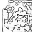

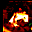

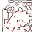

In [ ]:
from google.colab.patches import cv2_imshow
for i in range(len(Orig_images_list_train)):
  E_Img_Path = Edge_Image_train_Path+'/'+Edge_images_list_train[i]
  O_Img_Path = Orig_Image_train_Path+'/'+Orig_images_list_train[i]
  #print(E_Img_Path)
  e_img = cv2.imread(E_Img_Path)
  o_img = cv2.imread(O_Img_Path)
  enh_img = cv2.add(e_img,o_img)
  print(enh_img.shape)
  print(e_img.shape)
  print(o_img.shape)
  filename = enh_res_train_path+'/'+str(i)+'.png'
  #cv2.imwrite(filename, enh_img)
  cv2_imshow(e_img)
  cv2_imshow(o_img)
  cv2_imshow(enh_img)
  break


In [ ]:
# Creating Training  Edge enhanced images
from google.colab.patches import cv2_imshow
for i in range(len(Orig_images_list_train)):
  E_Img_Path = Edge_Image_train_Path+'/'+Edge_images_list_train[i]
  O_Img_Path = Orig_Image_train_Path+'/'+Orig_images_list_train[i]
  #print(E_Img_Path)
  e_img = cv2.imread(E_Img_Path)
  o_img = cv2.imread(O_Img_Path)
  enh_img = cv2.add(e_img,o_img)
  filename = enh_res_train_path+'/'+str(i)+'.png'
  cv2.imwrite(filename, enh_img)

In [13]:
dset_name = 'CIFAR10'
dset_type = 'test'
src_path = './data/'+dset_name
trg_path = './result/BIPED2CLASSIC/'+dset_name
enh_res_test_path = './enhanced_results/'+dset_name+'/'+dset_type

Edge_Image_test_Path = trg_path+'/'+dset_type+'/avg'
Edge_images_list_test = os.listdir(Edge_Image_test_Path)

Orig_Image_test_Path = src_path+'/'+dset_type
Orig_images_list_test = [f for f in os.listdir(Orig_Image_test_Path) if f.endswith('.png')]

len(Edge_images_list_test) == len(Orig_images_list_test)

True

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


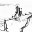

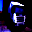

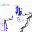

In [15]:
from google.colab.patches import cv2_imshow
for i in range(len(Orig_images_list_test)):
  E_Img_Path = Edge_Image_test_Path+'/'+Edge_images_list_test[i]
  O_Img_Path = Orig_Image_test_Path+'/'+Orig_images_list_test[i]
  #print(E_Img_Path)
  e_img = cv2.imread(E_Img_Path)
  o_img = cv2.imread(O_Img_Path)
  enh_img = cv2.add(e_img,o_img)
  print(enh_img.shape)
  print(e_img.shape)
  print(o_img.shape)
  filename = enh_res_test_path+'/'+str(i)+'.png'
  #cv2.imwrite(filename, enh_img)
  cv2_imshow(e_img)
  cv2_imshow(o_img)
  cv2_imshow(enh_img)
  break

In [ ]:
# Creating Test  Edge enhanced images
from google.colab.patches import cv2_imshow
for i in range(len(Orig_images_list_test)):
  E_Img_Path = Edge_Image_test_Path+'/'+Edge_images_list_test[i]
  O_Img_Path = Orig_Image_test_Path+'/'+Orig_images_list_test[i]
  #print(E_Img_Path)
  e_img = cv2.imread(E_Img_Path)
  o_img = cv2.imread(O_Img_Path)
  enh_img = cv2.add(e_img,o_img)
  filename = enh_res_test_path+'/'+str(i)+'.png'
  cv2.imwrite(filename, enh_img)

In [ ]:
# Creating image and label tuple

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/DexiNed-master

/content/drive/MyDrive/Colab Notebooks/DexiNed-master


In [ ]:
Label_train_Path = './data/CIFAR10/train'

#labels_train = [f for f in os.listdir(Label_train_Path) if f.endswith('.pt')]

In [10]:
Label_test_Path = './data/CIFAR10/test'

labels_test = [f for f in os.listdir(Label_test_Path) if f.endswith('.pt')]

In [12]:
torch.load(Label_test_Path+'/'+labels_test[0])

tensor([9])

In [ ]:

#image_label_list_train = []
#for img_name in Edge_images_list_train:
#  img = Image.open(Edge_Image_train_Path+'/'+img_name)
#  input = convert_tensor(img)
#  label_name = img_name.split('.')[0]+'label.pt'
#  label = torch.load(Label_train_Path+'/'+label_name)
#  print(label)
#  image_label_list_train.append((input,label))
#  break

tensor([6])


In [ ]:
image_label_list_test = []
for img_name in Edge_images_list_test:
  img = Image.open(Edge_Image_test_Path+'/'+img_name)
  input = convert_tensor(img)
  label_name = img_name.split('.')[0]+'label.pt'
  #print(label_name)
  label = torch.load(Label_test_Path+'/'+label_name)
  image_label_list_test.append((input,label))

In [18]:
len(image_label_list_test)

10000

In [20]:
loader = torch.utils.data.DataLoader(image_label_list_test,
                         batch_size=100,
                         num_workers=0,
                         shuffle=False)

mean = 0.
std = 0.
for images, _ in loader:
    batch_samples = images.size(0) # batch size (the last batch can have smaller size!)
    images = images.view(batch_samples, images.size(1), -1)
    mean += images.mean(2).sum(0)
    std += images.std(2).sum(0)

mean /= len(loader.dataset)
std /= len(loader.dataset)
print(mean,std)

tensor([0.8636]) tensor([0.2131])


In [21]:
h, w = 0, 0
device = 'cuda' if torch.cuda.is_available() else 'cpu'
for batch_idx, (inputs, targets) in enumerate(image_label_list_test):
    print()
    inputs = inputs.to(device)
    if batch_idx == 0:
      
        h, w = inputs.size(2), inputs.size(3)
        print(inputs.min(), inputs.max())
        chsum = inputs.sum(dim=(0, 2, 3), keepdim=True)
    else:
        chsum += inputs.sum(dim=(0, 2, 3), keepdim=True)
mean = chsum/len(trainset)/h/w
print('mean: %s' % mean.view(-1))

chsum = None
for batch_idx, (inputs, targets) in enumerate(image_label_list_test):
    inputs = inputs.to(device)
    if batch_idx == 0:
        chsum = (inputs - mean).pow(2).sum(dim=(0, 2, 3), keepdim=True)
    else:
        chsum += (inputs - mean).pow(2).sum(dim=(0, 2, 3), keepdim=True)
std = torch.sqrt(chsum/(len(trainset) * h * w - 1))
print('std: %s' % std.view(-1))

IndexError: ignored

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [ ]:
!python ./pytorch-cifar-master/main_CIFAR10.py

==> Preparing data..
==> Building model..

Epoch: 0
 [================================================================>]  Step: 448ms | Tot: 21s761ms | Loss: 2.139 | Acc: 22.846% (11423/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s545ms | Loss: 3.964 | Acc: 10.040% (1004/10000) 100/100 
Saving..

Epoch: 1
 [================================================================>]  Step: 39ms | Tot: 21s445ms | Loss: 1.695 | Acc: 36.938% (18469/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s572ms | Loss: 6.077 | Acc: 10.650% (1065/10000) 100/100 
Saving..

Epoch: 2
 [================================================================>]  Step: 37ms | Tot: 21s460ms | Loss: 1.524 | Acc: 44.496% (22248/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s552ms | Loss: 3.015 | Acc: 25.060% (2506/10000) 100/100 
Saving..

Epoch: 3
 [

**Output:**

```
==> Preparing data..
==> Building model..

Epoch: 0
 [================================================================>]  Step: 448ms | Tot: 21s761ms | Loss: 2.139 | Acc: 22.846% (11423/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s545ms | Loss: 3.964 | Acc: 10.040% (1004/10000) 100/100 
Saving..

Epoch: 1
 [================================================================>]  Step: 39ms | Tot: 21s445ms | Loss: 1.695 | Acc: 36.938% (18469/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s572ms | Loss: 6.077 | Acc: 10.650% (1065/10000) 100/100 
Saving..

Epoch: 2
 [================================================================>]  Step: 37ms | Tot: 21s460ms | Loss: 1.524 | Acc: 44.496% (22248/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s552ms | Loss: 3.015 | Acc: 25.060% (2506/10000) 100/100 
Saving..

Epoch: 3
 [================================================================>]  Step: 37ms | Tot: 21s443ms | Loss: 1.398 | Acc: 49.348% (24674/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s546ms | Loss: 14.681 | Acc: 11.970% (1197/10000) 100/100 

Epoch: 4
 [================================================================>]  Step: 37ms | Tot: 21s405ms | Loss: 1.284 | Acc: 53.876% (26938/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s537ms | Loss: 2.693 | Acc: 22.660% (2266/10000) 100/100 

Epoch: 5
 [================================================================>]  Step: 37ms | Tot: 21s461ms | Loss: 1.174 | Acc: 58.122% (29061/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s532ms | Loss: 6.659 | Acc: 14.470% (1447/10000) 100/100 

Epoch: 6
 [================================================================>]  Step: 38ms | Tot: 21s375ms | Loss: 1.077 | Acc: 61.952% (30976/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s548ms | Loss: 3.893 | Acc: 21.230% (2123/10000) 100/100 

Epoch: 7
 [================================================================>]  Step: 37ms | Tot: 21s614ms | Loss: 1.001 | Acc: 64.846% (32423/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s546ms | Loss: 4.242 | Acc: 18.770% (1877/10000) 100/100 

Epoch: 8
 [================================================================>]  Step: 37ms | Tot: 21s489ms | Loss: 0.934 | Acc: 67.248% (33624/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s552ms | Loss: 2.267 | Acc: 39.420% (3942/10000) 100/100 
Saving..

Epoch: 9
 [================================================================>]  Step: 37ms | Tot: 21s369ms | Loss: 0.869 | Acc: 69.470% (34735/50000) 391/391 
 [================================================================>]  Step: 17ms | Tot: 1s538ms | Loss: 2.443 | Acc: 38.220% (3822/10000) 100/100 

Epoch: 10
 [================================================================>]  Step: 37ms | Tot: 21s445ms | Loss: 0.817 | Acc: 71.628% (35814/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s536ms | Loss: 1.326 | Acc: 56.330% (5633/10000) 100/100 
Saving..

Epoch: 11
 [================================================================>]  Step: 37ms | Tot: 21s409ms | Loss: 0.755 | Acc: 73.410% (36705/50000) 391/391 
 [================================================================>]  Step: 14ms | Tot: 1s540ms | Loss: 1.932 | Acc: 44.610% (4461/10000) 100/100 

Epoch: 12
 [================================================================>]  Step: 39ms | Tot: 21s449ms | Loss: 0.699 | Acc: 75.446% (37723/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s532ms | Loss: 1.527 | Acc: 47.610% (4761/10000) 100/100 

Epoch: 13
 [================================================================>]  Step: 40ms | Tot: 21s444ms | Loss: 0.649 | Acc: 77.114% (38557/50000) 391/391 
 [================================================================>]  Step: 16ms | Tot: 1s675ms | Loss: 2.047 | Acc: 42.630% (4263/10000) 100/100 

Epoch: 14
 [================================================================>]  Step: 39ms | Tot: 21s570ms | Loss: 0.606 | Acc: 78.628% (39314/50000) 391/391 
 [================================================================>]  Step: 14ms | Tot: 1s541ms | Loss: 1.753 | Acc: 51.370% (5137/10000) 100/100 

Epoch: 15
 [================================================================>]  Step: 37ms | Tot: 21s469ms | Loss: 0.560 | Acc: 80.194% (40097/50000) 391/391 
 [================================================================>]  Step: 14ms | Tot: 1s554ms | Loss: 1.365 | Acc: 56.870% (5687/10000) 100/100 
Saving..

Epoch: 16
 [================================================================>]  Step: 37ms | Tot: 21s380ms | Loss: 0.531 | Acc: 81.298% (40649/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s533ms | Loss: 2.135 | Acc: 42.450% (4245/10000) 100/100 

Epoch: 17
 [================================================================>]  Step: 38ms | Tot: 21s383ms | Loss: 0.494 | Acc: 82.662% (41331/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s540ms | Loss: 4.279 | Acc: 21.190% (2119/10000) 100/100 

Epoch: 18
 [================================================================>]  Step: 37ms | Tot: 21s389ms | Loss: 0.467 | Acc: 83.706% (41853/50000) 391/391 
 [================================================================>]  Step: 14ms | Tot: 1s553ms | Loss: 1.878 | Acc: 48.260% (4826/10000) 100/100 

Epoch: 19
 [================================================================>]  Step: 37ms | Tot: 21s394ms | Loss: 0.439 | Acc: 84.594% (42297/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s556ms | Loss: 2.695 | Acc: 37.690% (3769/10000) 100/100 

Epoch: 20
 [================================================================>]  Step: 37ms | Tot: 21s422ms | Loss: 0.427 | Acc: 85.034% (42517/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s548ms | Loss: 2.024 | Acc: 45.170% (4517/10000) 100/100 

Epoch: 21
 [================================================================>]  Step: 37ms | Tot: 21s425ms | Loss: 0.408 | Acc: 85.710% (42855/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s528ms | Loss: 2.794 | Acc: 35.040% (3504/10000) 100/100 

Epoch: 22
 [================================================================>]  Step: 38ms | Tot: 21s471ms | Loss: 0.397 | Acc: 86.106% (43053/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s540ms | Loss: 2.266 | Acc: 41.490% (4149/10000) 100/100 

Epoch: 23
 [================================================================>]  Step: 38ms | Tot: 21s498ms | Loss: 0.388 | Acc: 86.452% (43226/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s538ms | Loss: 4.453 | Acc: 27.130% (2713/10000) 100/100 

Epoch: 24
 [================================================================>]  Step: 38ms | Tot: 21s417ms | Loss: 0.382 | Acc: 86.780% (43390/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s540ms | Loss: 4.227 | Acc: 29.590% (2959/10000) 100/100 

Epoch: 25
 [================================================================>]  Step: 37ms | Tot: 21s474ms | Loss: 0.378 | Acc: 86.788% (43394/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s563ms | Loss: 2.377 | Acc: 44.920% (4492/10000) 100/100 

Epoch: 26
 [================================================================>]  Step: 38ms | Tot: 21s439ms | Loss: 0.367 | Acc: 87.142% (43571/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s637ms | Loss: 3.979 | Acc: 30.230% (3023/10000) 100/100 

Epoch: 27
 [================================================================>]  Step: 37ms | Tot: 21s452ms | Loss: 0.366 | Acc: 87.344% (43672/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s541ms | Loss: 2.405 | Acc: 43.560% (4356/10000) 100/100 

Epoch: 28
 [================================================================>]  Step: 38ms | Tot: 21s532ms | Loss: 0.356 | Acc: 87.762% (43881/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s538ms | Loss: 2.665 | Acc: 41.970% (4197/10000) 100/100 

Epoch: 29
 [================================================================>]  Step: 37ms | Tot: 21s495ms | Loss: 0.352 | Acc: 87.822% (43911/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s525ms | Loss: 2.877 | Acc: 32.970% (3297/10000) 100/100 

Epoch: 30
 [================================================================>]  Step: 40ms | Tot: 21s566ms | Loss: 0.344 | Acc: 88.136% (44068/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s613ms | Loss: 2.606 | Acc: 39.600% (3960/10000) 100/100 

Epoch: 31
 [================================================================>]  Step: 37ms | Tot: 21s447ms | Loss: 0.338 | Acc: 88.200% (44100/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s547ms | Loss: 3.587 | Acc: 33.940% (3394/10000) 100/100 

Epoch: 32
 [================================================================>]  Step: 38ms | Tot: 21s455ms | Loss: 0.346 | Acc: 88.004% (44002/50000) 391/391 
 [================================================================>]  Step: 14ms | Tot: 1s534ms | Loss: 3.499 | Acc: 31.540% (3154/10000) 100/100 

Epoch: 33
 [================================================================>]  Step: 37ms | Tot: 21s453ms | Loss: 0.326 | Acc: 88.854% (44427/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s547ms | Loss: 4.366 | Acc: 23.580% (2358/10000) 100/100 

Epoch: 34
 [================================================================>]  Step: 37ms | Tot: 21s521ms | Loss: 0.340 | Acc: 88.178% (44089/50000) 391/391 
 [================================================================>]  Step: 14ms | Tot: 1s552ms | Loss: 3.703 | Acc: 21.970% (2197/10000) 100/100 

Epoch: 35
 [================================================================>]  Step: 37ms | Tot: 21s508ms | Loss: 0.326 | Acc: 88.800% (44400/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s548ms | Loss: 2.082 | Acc: 50.350% (5035/10000) 100/100 

Epoch: 36
 [================================================================>]  Step: 37ms | Tot: 21s459ms | Loss: 0.325 | Acc: 88.874% (44437/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s553ms | Loss: 4.719 | Acc: 25.220% (2522/10000) 100/100 

Epoch: 37
 [================================================================>]  Step: 37ms | Tot: 21s381ms | Loss: 0.304 | Acc: 89.480% (44740/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s531ms | Loss: 4.580 | Acc: 22.380% (2238/10000) 100/100 

Epoch: 38
 [================================================================>]  Step: 37ms | Tot: 21s407ms | Loss: 0.328 | Acc: 88.644% (44322/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s534ms | Loss: 4.148 | Acc: 23.980% (2398/10000) 100/100 

Epoch: 39
 [================================================================>]  Step: 39ms | Tot: 21s516ms | Loss: 0.316 | Acc: 88.974% (44487/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s549ms | Loss: 3.007 | Acc: 37.660% (3766/10000) 100/100 

Epoch: 40
 [================================================================>]  Step: 37ms | Tot: 21s383ms | Loss: 0.303 | Acc: 89.570% (44785/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s580ms | Loss: 3.457 | Acc: 34.320% (3432/10000) 100/100 

Epoch: 41
 [================================================================>]  Step: 38ms | Tot: 21s409ms | Loss: 0.312 | Acc: 89.428% (44714/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s549ms | Loss: 1.776 | Acc: 55.840% (5584/10000) 100/100 

Epoch: 42
 [================================================================>]  Step: 37ms | Tot: 21s464ms | Loss: 0.298 | Acc: 89.714% (44857/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s545ms | Loss: 1.923 | Acc: 53.640% (5364/10000) 100/100 

Epoch: 43
 [================================================================>]  Step: 37ms | Tot: 21s466ms | Loss: 0.303 | Acc: 89.514% (44757/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s539ms | Loss: 1.983 | Acc: 52.310% (5231/10000) 100/100 

Epoch: 44
 [================================================================>]  Step: 37ms | Tot: 21s374ms | Loss: 0.306 | Acc: 89.344% (44672/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s547ms | Loss: 1.755 | Acc: 49.730% (4973/10000) 100/100 

Epoch: 45
 [================================================================>]  Step: 37ms | Tot: 21s412ms | Loss: 0.284 | Acc: 90.014% (45007/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s522ms | Loss: 3.279 | Acc: 36.860% (3686/10000) 100/100 

Epoch: 46
 [================================================================>]  Step: 38ms | Tot: 21s413ms | Loss: 0.298 | Acc: 89.594% (44797/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s541ms | Loss: 2.952 | Acc: 37.140% (3714/10000) 100/100 

Epoch: 47
 [================================================================>]  Step: 38ms | Tot: 21s436ms | Loss: 0.287 | Acc: 89.984% (44992/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s554ms | Loss: 1.802 | Acc: 53.980% (5398/10000) 100/100 

Epoch: 48
 [================================================================>]  Step: 38ms | Tot: 21s433ms | Loss: 0.287 | Acc: 90.246% (45123/50000) 391/391 
 [================================================================>]  Step: 14ms | Tot: 1s533ms | Loss: 1.582 | Acc: 54.760% (5476/10000) 100/100 

Epoch: 49
 [================================================================>]  Step: 37ms | Tot: 21s427ms | Loss: 0.281 | Acc: 90.258% (45129/50000) 391/391 
 [================================================================>]  Step: 14ms | Tot: 1s547ms | Loss: 3.408 | Acc: 32.650% (3265/10000) 100/100 

Epoch: 50
 [================================================================>]  Step: 39ms | Tot: 21s481ms | Loss: 0.286 | Acc: 90.164% (45082/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s586ms | Loss: 2.452 | Acc: 43.800% (4380/10000) 100/100 

Epoch: 51
 [================================================================>]  Step: 37ms | Tot: 21s428ms | Loss: 0.271 | Acc: 90.748% (45374/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s548ms | Loss: 2.412 | Acc: 45.940% (4594/10000) 100/100 

Epoch: 52
 [================================================================>]  Step: 37ms | Tot: 21s389ms | Loss: 0.282 | Acc: 90.386% (45193/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s548ms | Loss: 2.590 | Acc: 41.690% (4169/10000) 100/100 

Epoch: 53
 [================================================================>]  Step: 37ms | Tot: 21s449ms | Loss: 0.269 | Acc: 90.712% (45356/50000) 391/391 
 [================================================================>]  Step: 14ms | Tot: 1s542ms | Loss: 3.672 | Acc: 31.960% (3196/10000) 100/100 

Epoch: 54
 [================================================================>]  Step: 37ms | Tot: 21s446ms | Loss: 0.276 | Acc: 90.632% (45316/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s558ms | Loss: 2.466 | Acc: 46.990% (4699/10000) 100/100 

Epoch: 55
 [================================================================>]  Step: 37ms | Tot: 21s470ms | Loss: 0.262 | Acc: 91.020% (45510/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s539ms | Loss: 1.566 | Acc: 59.180% (5918/10000) 100/100 
Saving..

Epoch: 56
 [================================================================>]  Step: 37ms | Tot: 21s521ms | Loss: 0.267 | Acc: 90.880% (45440/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s528ms | Loss: 2.700 | Acc: 41.560% (4156/10000) 100/100 

Epoch: 57
 [================================================================>]  Step: 37ms | Tot: 21s488ms | Loss: 0.257 | Acc: 91.242% (45621/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s538ms | Loss: 2.318 | Acc: 46.490% (4649/10000) 100/100 

Epoch: 58
 [================================================================>]  Step: 37ms | Tot: 21s487ms | Loss: 0.259 | Acc: 91.104% (45552/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s553ms | Loss: 2.503 | Acc: 45.510% (4551/10000) 100/100 

Epoch: 59
 [================================================================>]  Step: 37ms | Tot: 21s490ms | Loss: 0.252 | Acc: 91.412% (45706/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s534ms | Loss: 1.974 | Acc: 51.520% (5152/10000) 100/100 

Epoch: 60
 [================================================================>]  Step: 38ms | Tot: 21s471ms | Loss: 0.249 | Acc: 91.336% (45668/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s567ms | Loss: 1.895 | Acc: 54.420% (5442/10000) 100/100 

Epoch: 61
 [================================================================>]  Step: 38ms | Tot: 21s411ms | Loss: 0.243 | Acc: 91.770% (45885/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s557ms | Loss: 3.502 | Acc: 35.970% (3597/10000) 100/100 

Epoch: 62
 [================================================================>]  Step: 38ms | Tot: 21s442ms | Loss: 0.250 | Acc: 91.458% (45729/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s541ms | Loss: 2.405 | Acc: 42.910% (4291/10000) 100/100 

Epoch: 63
 [================================================================>]  Step: 37ms | Tot: 21s446ms | Loss: 0.252 | Acc: 91.390% (45695/50000) 391/391 
 [================================================================>]  Step: 16ms | Tot: 1s544ms | Loss: 3.442 | Acc: 33.960% (3396/10000) 100/100 

Epoch: 64
 [================================================================>]  Step: 37ms | Tot: 21s398ms | Loss: 0.243 | Acc: 91.764% (45882/50000) 391/391 
 [================================================================>]  Step: 14ms | Tot: 1s528ms | Loss: 3.482 | Acc: 38.050% (3805/10000) 100/100 

Epoch: 65
 [================================================================>]  Step: 39ms | Tot: 21s426ms | Loss: 0.233 | Acc: 92.126% (46063/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s595ms | Loss: 2.148 | Acc: 46.330% (4633/10000) 100/100 

Epoch: 66
 [================================================================>]  Step: 37ms | Tot: 21s428ms | Loss: 0.228 | Acc: 92.158% (46079/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s547ms | Loss: 2.905 | Acc: 43.500% (4350/10000) 100/100 

Epoch: 67
 [================================================================>]  Step: 40ms | Tot: 21s378ms | Loss: 0.239 | Acc: 91.718% (45859/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s561ms | Loss: 3.415 | Acc: 33.050% (3305/10000) 100/100 

Epoch: 68
 [================================================================>]  Step: 37ms | Tot: 21s393ms | Loss: 0.234 | Acc: 92.020% (46010/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s544ms | Loss: 2.159 | Acc: 49.990% (4999/10000) 100/100 

Epoch: 69
 [================================================================>]  Step: 37ms | Tot: 21s441ms | Loss: 0.227 | Acc: 92.190% (46095/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s537ms | Loss: 5.853 | Acc: 15.200% (1520/10000) 100/100 

Epoch: 70
 [================================================================>]  Step: 37ms | Tot: 21s395ms | Loss: 0.219 | Acc: 92.406% (46203/50000) 391/391 
 [================================================================>]  Step: 14ms | Tot: 1s547ms | Loss: 2.072 | Acc: 49.410% (4941/10000) 100/100 

Epoch: 71
 [================================================================>]  Step: 41ms | Tot: 21s429ms | Loss: 0.221 | Acc: 92.426% (46213/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s610ms | Loss: 3.215 | Acc: 38.790% (3879/10000) 100/100 

Epoch: 72
 [================================================================>]  Step: 38ms | Tot: 21s387ms | Loss: 0.215 | Acc: 92.730% (46365/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s556ms | Loss: 3.076 | Acc: 36.260% (3626/10000) 100/100 

Epoch: 73
 [================================================================>]  Step: 37ms | Tot: 21s472ms | Loss: 0.214 | Acc: 92.806% (46403/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s545ms | Loss: 5.490 | Acc: 16.940% (1694/10000) 100/100 

Epoch: 74
 [================================================================>]  Step: 38ms | Tot: 21s399ms | Loss: 0.209 | Acc: 92.844% (46422/50000) 391/391 
 [================================================================>]  Step: 16ms | Tot: 1s540ms | Loss: 2.347 | Acc: 49.270% (4927/10000) 100/100 

Epoch: 75
 [================================================================>]  Step: 37ms | Tot: 21s439ms | Loss: 0.216 | Acc: 92.638% (46319/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s543ms | Loss: 7.763 | Acc: 12.490% (1249/10000) 100/100 

Epoch: 76
 [================================================================>]  Step: 37ms | Tot: 21s426ms | Loss: 0.211 | Acc: 92.854% (46427/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s540ms | Loss: 2.639 | Acc: 45.550% (4555/10000) 100/100 

Epoch: 77
 [================================================================>]  Step: 37ms | Tot: 21s475ms | Loss: 0.199 | Acc: 93.224% (46612/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s546ms | Loss: 2.040 | Acc: 52.780% (5278/10000) 100/100 

Epoch: 78
 [================================================================>]  Step: 37ms | Tot: 21s502ms | Loss: 0.202 | Acc: 93.236% (46618/50000) 391/391 
 [================================================================>]  Step: 14ms | Tot: 1s546ms | Loss: 4.273 | Acc: 19.990% (1999/10000) 100/100 

Epoch: 79
 [================================================================>]  Step: 37ms | Tot: 21s462ms | Loss: 0.186 | Acc: 93.658% (46829/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s546ms | Loss: 2.698 | Acc: 41.770% (4177/10000) 100/100 

Epoch: 80
 [================================================================>]  Step: 37ms | Tot: 21s382ms | Loss: 0.200 | Acc: 93.040% (46520/50000) 391/391 
 [================================================================>]  Step: 14ms | Tot: 1s546ms | Loss: 4.070 | Acc: 34.720% (3472/10000) 100/100 

Epoch: 81
 [================================================================>]  Step: 37ms | Tot: 21s434ms | Loss: 0.183 | Acc: 93.758% (46879/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s540ms | Loss: 2.916 | Acc: 38.990% (3899/10000) 100/100 

Epoch: 82
 [================================================================>]  Step: 37ms | Tot: 21s395ms | Loss: 0.190 | Acc: 93.624% (46812/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s546ms | Loss: 2.300 | Acc: 45.500% (4550/10000) 100/100 

Epoch: 83
 [================================================================>]  Step: 37ms | Tot: 21s491ms | Loss: 0.191 | Acc: 93.488% (46744/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s560ms | Loss: 2.215 | Acc: 45.280% (4528/10000) 100/100 

Epoch: 84
 [================================================================>]  Step: 37ms | Tot: 21s415ms | Loss: 0.177 | Acc: 94.034% (47017/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s545ms | Loss: 1.961 | Acc: 51.490% (5149/10000) 100/100 

Epoch: 85
 [================================================================>]  Step: 37ms | Tot: 21s409ms | Loss: 0.185 | Acc: 93.716% (46858/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s563ms | Loss: 5.272 | Acc: 26.220% (2622/10000) 100/100 

Epoch: 86
 [================================================================>]  Step: 38ms | Tot: 21s391ms | Loss: 0.173 | Acc: 94.058% (47029/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s546ms | Loss: 3.581 | Acc: 31.780% (3178/10000) 100/100 

Epoch: 87
 [================================================================>]  Step: 37ms | Tot: 21s425ms | Loss: 0.176 | Acc: 94.042% (47021/50000) 391/391 
 [================================================================>]  Step: 16ms | Tot: 1s539ms | Loss: 5.582 | Acc: 15.350% (1535/10000) 100/100 

Epoch: 88
 [================================================================>]  Step: 38ms | Tot: 21s442ms | Loss: 0.161 | Acc: 94.478% (47239/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s552ms | Loss: 3.770 | Acc: 29.670% (2967/10000) 100/100 

Epoch: 89
 [================================================================>]  Step: 37ms | Tot: 21s378ms | Loss: 0.175 | Acc: 94.074% (47037/50000) 391/391 
 [================================================================>]  Step: 14ms | Tot: 1s542ms | Loss: 2.367 | Acc: 47.420% (4742/10000) 100/100 

Epoch: 90
 [================================================================>]  Step: 37ms | Tot: 21s383ms | Loss: 0.162 | Acc: 94.512% (47256/50000) 391/391 
 [================================================================>]  Step: 14ms | Tot: 1s546ms | Loss: 2.545 | Acc: 43.320% (4332/10000) 100/100 

Epoch: 91
 [================================================================>]  Step: 38ms | Tot: 21s411ms | Loss: 0.156 | Acc: 94.684% (47342/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s594ms | Loss: 2.513 | Acc: 49.130% (4913/10000) 100/100 

Epoch: 92
 [================================================================>]  Step: 37ms | Tot: 21s392ms | Loss: 0.161 | Acc: 94.594% (47297/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s562ms | Loss: 2.595 | Acc: 44.720% (4472/10000) 100/100 

Epoch: 93
 [================================================================>]  Step: 37ms | Tot: 21s394ms | Loss: 0.153 | Acc: 94.930% (47465/50000) 391/391 
 [================================================================>]  Step: 14ms | Tot: 1s545ms | Loss: 2.371 | Acc: 44.920% (4492/10000) 100/100 

Epoch: 94
 [================================================================>]  Step: 37ms | Tot: 21s483ms | Loss: 0.158 | Acc: 94.620% (47310/50000) 391/391 
 [================================================================>]  Step: 14ms | Tot: 1s545ms | Loss: 1.806 | Acc: 55.710% (5571/10000) 100/100 

Epoch: 95
 [================================================================>]  Step: 38ms | Tot: 21s415ms | Loss: 0.146 | Acc: 95.124% (47562/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s537ms | Loss: 1.956 | Acc: 51.720% (5172/10000) 100/100 

Epoch: 96
 [================================================================>]  Step: 37ms | Tot: 21s445ms | Loss: 0.147 | Acc: 94.952% (47476/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s522ms | Loss: 4.139 | Acc: 26.580% (2658/10000) 100/100 

Epoch: 97
 [================================================================>]  Step: 38ms | Tot: 21s427ms | Loss: 0.140 | Acc: 95.254% (47627/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s536ms | Loss: 1.889 | Acc: 50.560% (5056/10000) 100/100 

Epoch: 98
 [================================================================>]  Step: 37ms | Tot: 21s419ms | Loss: 0.147 | Acc: 95.138% (47569/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s543ms | Loss: 3.504 | Acc: 29.380% (2938/10000) 100/100 

Epoch: 99
 [================================================================>]  Step: 37ms | Tot: 21s456ms | Loss: 0.131 | Acc: 95.490% (47745/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s540ms | Loss: 3.032 | Acc: 41.150% (4115/10000) 100/100 

Epoch: 100
 [================================================================>]  Step: 37ms | Tot: 21s448ms | Loss: 0.133 | Acc: 95.560% (47780/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s552ms | Loss: 3.932 | Acc: 24.460% (2446/10000) 100/100 

Epoch: 101
 [================================================================>]  Step: 38ms | Tot: 21s465ms | Loss: 0.128 | Acc: 95.754% (47877/50000) 391/391 
 [================================================================>]  Step: 14ms | Tot: 1s558ms | Loss: 3.237 | Acc: 34.360% (3436/10000) 100/100 

Epoch: 102
 [================================================================>]  Step: 38ms | Tot: 21s397ms | Loss: 0.121 | Acc: 95.944% (47972/50000) 391/391 
 [================================================================>]  Step: 14ms | Tot: 1s542ms | Loss: 1.883 | Acc: 55.140% (5514/10000) 100/100 

Epoch: 103
 [================================================================>]  Step: 37ms | Tot: 21s463ms | Loss: 0.130 | Acc: 95.552% (47776/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s544ms | Loss: 3.155 | Acc: 41.220% (4122/10000) 100/100 

Epoch: 104
 [================================================================>]  Step: 37ms | Tot: 21s402ms | Loss: 0.128 | Acc: 95.658% (47829/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s560ms | Loss: 3.421 | Acc: 34.890% (3489/10000) 100/100 

Epoch: 105
 [================================================================>]  Step: 37ms | Tot: 21s446ms | Loss: 0.103 | Acc: 96.624% (48312/50000) 391/391 
 [================================================================>]  Step: 14ms | Tot: 1s526ms | Loss: 2.635 | Acc: 47.410% (4741/10000) 100/100 

Epoch: 106
 [================================================================>]  Step: 37ms | Tot: 21s429ms | Loss: 0.114 | Acc: 96.174% (48087/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s533ms | Loss: 2.226 | Acc: 51.190% (5119/10000) 100/100 

Epoch: 107
 [================================================================>]  Step: 38ms | Tot: 21s602ms | Loss: 0.127 | Acc: 95.708% (47854/50000) 391/391 
 [================================================================>]  Step: 14ms | Tot: 1s513ms | Loss: 3.422 | Acc: 41.030% (4103/10000) 100/100 

Epoch: 108
 [================================================================>]  Step: 37ms | Tot: 21s529ms | Loss: 0.107 | Acc: 96.454% (48227/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s546ms | Loss: 4.011 | Acc: 32.410% (3241/10000) 100/100 

Epoch: 109
 [================================================================>]  Step: 37ms | Tot: 21s423ms | Loss: 0.091 | Acc: 96.980% (48490/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s575ms | Loss: 3.759 | Acc: 37.520% (3752/10000) 100/100 

Epoch: 110
 [================================================================>]  Step: 38ms | Tot: 21s433ms | Loss: 0.110 | Acc: 96.270% (48135/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s550ms | Loss: 2.023 | Acc: 56.540% (5654/10000) 100/100 

Epoch: 111
 [================================================================>]  Step: 37ms | Tot: 21s451ms | Loss: 0.110 | Acc: 96.316% (48158/50000) 391/391 
 [================================================================>]  Step: 14ms | Tot: 1s550ms | Loss: 1.936 | Acc: 54.500% (5450/10000) 100/100 

Epoch: 112
 [================================================================>]  Step: 38ms | Tot: 21s473ms | Loss: 0.101 | Acc: 96.650% (48325/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s555ms | Loss: 2.196 | Acc: 51.560% (5156/10000) 100/100 

Epoch: 113
 [================================================================>]  Step: 40ms | Tot: 21s480ms | Loss: 0.086 | Acc: 97.250% (48625/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s546ms | Loss: 2.851 | Acc: 41.880% (4188/10000) 100/100 

Epoch: 114
 [================================================================>]  Step: 39ms | Tot: 21s427ms | Loss: 0.081 | Acc: 97.370% (48685/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s544ms | Loss: 4.548 | Acc: 31.710% (3171/10000) 100/100 

Epoch: 115
 [================================================================>]  Step: 37ms | Tot: 21s504ms | Loss: 0.082 | Acc: 97.234% (48617/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s558ms | Loss: 3.587 | Acc: 33.340% (3334/10000) 100/100 

Epoch: 116
 [================================================================>]  Step: 39ms | Tot: 21s470ms | Loss: 0.090 | Acc: 97.078% (48539/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s562ms | Loss: 2.437 | Acc: 46.550% (4655/10000) 100/100 

Epoch: 117
 [================================================================>]  Step: 37ms | Tot: 21s440ms | Loss: 0.103 | Acc: 96.410% (48205/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s555ms | Loss: 2.321 | Acc: 50.990% (5099/10000) 100/100 

Epoch: 118
 [================================================================>]  Step: 37ms | Tot: 21s398ms | Loss: 0.088 | Acc: 97.052% (48526/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s550ms | Loss: 3.942 | Acc: 29.690% (2969/10000) 100/100 

Epoch: 119
 [================================================================>]  Step: 37ms | Tot: 21s452ms | Loss: 0.072 | Acc: 97.706% (48853/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s539ms | Loss: 2.964 | Acc: 42.050% (4205/10000) 100/100 

Epoch: 120
 [================================================================>]  Step: 37ms | Tot: 21s423ms | Loss: 0.056 | Acc: 98.226% (49113/50000) 391/391 
 [================================================================>]  Step: 14ms | Tot: 1s553ms | Loss: 2.064 | Acc: 55.010% (5501/10000) 100/100 

Epoch: 121
 [================================================================>]  Step: 37ms | Tot: 21s442ms | Loss: 0.048 | Acc: 98.518% (49259/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s537ms | Loss: 2.381 | Acc: 48.960% (4896/10000) 100/100 

Epoch: 122
 [================================================================>]  Step: 37ms | Tot: 21s453ms | Loss: 0.053 | Acc: 98.294% (49147/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s536ms | Loss: 4.818 | Acc: 31.670% (3167/10000) 100/100 

Epoch: 123
 [================================================================>]  Step: 39ms | Tot: 21s422ms | Loss: 0.082 | Acc: 97.326% (48663/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s561ms | Loss: 2.142 | Acc: 52.680% (5268/10000) 100/100 

Epoch: 124
 [================================================================>]  Step: 38ms | Tot: 21s426ms | Loss: 0.097 | Acc: 96.808% (48404/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s542ms | Loss: 2.458 | Acc: 48.220% (4822/10000) 100/100 

Epoch: 125
 [================================================================>]  Step: 37ms | Tot: 21s425ms | Loss: 0.090 | Acc: 97.026% (48513/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s551ms | Loss: 2.985 | Acc: 40.230% (4023/10000) 100/100 

Epoch: 126
 [================================================================>]  Step: 37ms | Tot: 21s414ms | Loss: 0.058 | Acc: 98.184% (49092/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s547ms | Loss: 2.751 | Acc: 46.190% (4619/10000) 100/100 

Epoch: 127
 [================================================================>]  Step: 37ms | Tot: 21s440ms | Loss: 0.033 | Acc: 99.056% (49528/50000) 391/391 
 [================================================================>]  Step: 14ms | Tot: 1s540ms | Loss: 1.997 | Acc: 55.460% (5546/10000) 100/100 

Epoch: 128
 [================================================================>]  Step: 37ms | Tot: 21s447ms | Loss: 0.015 | Acc: 99.654% (49827/50000) 391/391 
 [================================================================>]  Step: 16ms | Tot: 1s542ms | Loss: 1.591 | Acc: 62.530% (6253/10000) 100/100 
Saving..

Epoch: 129
 [================================================================>]  Step: 37ms | Tot: 21s461ms | Loss: 0.005 | Acc: 99.938% (49969/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s553ms | Loss: 1.348 | Acc: 66.370% (6637/10000) 100/100 
Saving..

Epoch: 130
 [================================================================>]  Step: 37ms | Tot: 21s406ms | Loss: 0.003 | Acc: 99.932% (49966/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s551ms | Loss: 1.300 | Acc: 65.780% (6578/10000) 100/100 

Epoch: 131
 [================================================================>]  Step: 38ms | Tot: 21s389ms | Loss: 0.003 | Acc: 99.938% (49969/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s542ms | Loss: 1.227 | Acc: 67.120% (6712/10000) 100/100 
Saving..

Epoch: 132
 [================================================================>]  Step: 37ms | Tot: 21s424ms | Loss: 0.003 | Acc: 99.946% (49973/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s537ms | Loss: 1.201 | Acc: 67.080% (6708/10000) 100/100 

Epoch: 133
 [================================================================>]  Step: 37ms | Tot: 21s394ms | Loss: 0.003 | Acc: 99.940% (49970/50000) 391/391 
 [================================================================>]  Step: 14ms | Tot: 1s532ms | Loss: 1.162 | Acc: 67.510% (6751/10000) 100/100 
Saving..

Epoch: 134
 [================================================================>]  Step: 37ms | Tot: 21s441ms | Loss: 0.003 | Acc: 99.942% (49971/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s547ms | Loss: 1.155 | Acc: 66.950% (6695/10000) 100/100 

Epoch: 135
 [================================================================>]  Step: 37ms | Tot: 21s402ms | Loss: 0.004 | Acc: 99.944% (49972/50000) 391/391 
 [================================================================>]  Step: 14ms | Tot: 1s555ms | Loss: 1.316 | Acc: 62.900% (6290/10000) 100/100 

Epoch: 136
 [================================================================>]  Step: 37ms | Tot: 21s418ms | Loss: 0.004 | Acc: 99.946% (49973/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s535ms | Loss: 1.127 | Acc: 67.220% (6722/10000) 100/100 

Epoch: 137
 [================================================================>]  Step: 37ms | Tot: 21s415ms | Loss: 0.004 | Acc: 99.946% (49973/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s516ms | Loss: 1.471 | Acc: 58.820% (5882/10000) 100/100 

Epoch: 138
 [================================================================>]  Step: 37ms | Tot: 21s457ms | Loss: 0.004 | Acc: 99.940% (49970/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s550ms | Loss: 1.117 | Acc: 66.940% (6694/10000) 100/100 

Epoch: 139
 [================================================================>]  Step: 37ms | Tot: 21s385ms | Loss: 0.003 | Acc: 99.950% (49975/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s564ms | Loss: 1.111 | Acc: 66.970% (6697/10000) 100/100 

Epoch: 140
 [================================================================>]  Step: 37ms | Tot: 21s413ms | Loss: 0.003 | Acc: 99.950% (49975/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s543ms | Loss: 1.125 | Acc: 66.760% (6676/10000) 100/100 

Epoch: 141
 [================================================================>]  Step: 37ms | Tot: 21s477ms | Loss: 0.004 | Acc: 99.952% (49976/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s540ms | Loss: 1.091 | Acc: 67.580% (6758/10000) 100/100 
Saving..

Epoch: 142
 [================================================================>]  Step: 37ms | Tot: 21s434ms | Loss: 0.003 | Acc: 99.952% (49976/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s564ms | Loss: 1.109 | Acc: 66.590% (6659/10000) 100/100 

Epoch: 143
 [================================================================>]  Step: 39ms | Tot: 21s396ms | Loss: 0.003 | Acc: 99.954% (49977/50000) 391/391 
 [================================================================>]  Step: 14ms | Tot: 1s613ms | Loss: 1.079 | Acc: 67.600% (6760/10000) 100/100 
Saving..

Epoch: 144
 [================================================================>]  Step: 37ms | Tot: 21s448ms | Loss: 0.003 | Acc: 99.956% (49978/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s547ms | Loss: 1.078 | Acc: 67.670% (6767/10000) 100/100 
Saving..

Epoch: 145
 [================================================================>]  Step: 38ms | Tot: 21s466ms | Loss: 0.003 | Acc: 99.956% (49978/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s545ms | Loss: 1.079 | Acc: 67.610% (6761/10000) 100/100 

Epoch: 146
 [================================================================>]  Step: 38ms | Tot: 21s490ms | Loss: 0.003 | Acc: 99.956% (49978/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s538ms | Loss: 1.079 | Acc: 67.570% (6757/10000) 100/100 

Epoch: 147
 [================================================================>]  Step: 38ms | Tot: 21s536ms | Loss: 0.003 | Acc: 99.956% (49978/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s547ms | Loss: 1.074 | Acc: 67.880% (6788/10000) 100/100 
Saving..

Epoch: 148
 [================================================================>]  Step: 37ms | Tot: 21s472ms | Loss: 0.003 | Acc: 99.954% (49977/50000) 391/391 
 [================================================================>]  Step: 14ms | Tot: 1s553ms | Loss: 1.076 | Acc: 67.410% (6741/10000) 100/100 

Epoch: 149
 [================================================================>]  Step: 37ms | Tot: 21s383ms | Loss: 0.003 | Acc: 99.956% (49978/50000) 391/391 
 [================================================================>]  Step: 14ms | Tot: 1s536ms | Loss: 1.071 | Acc: 67.630% (6763/10000) 100/100 

Epoch: 150
 [================================================================>]  Step: 37ms | Tot: 21s518ms | Loss: 0.003 | Acc: 99.954% (49977/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s564ms | Loss: 1.074 | Acc: 67.610% (6761/10000) 100/100 

Epoch: 151
 [================================================================>]  Step: 37ms | Tot: 21s504ms | Loss: 0.003 | Acc: 99.952% (49976/50000) 391/391 
 [================================================================>]  Step: 14ms | Tot: 1s551ms | Loss: 1.076 | Acc: 67.500% (6750/10000) 100/100 

Epoch: 152
 [================================================================>]  Step: 40ms | Tot: 21s450ms | Loss: 0.003 | Acc: 99.956% (49978/50000) 391/391 
 [================================================================>]  Step: 16ms | Tot: 1s639ms | Loss: 1.070 | Acc: 67.610% (6761/10000) 100/100 

Epoch: 153
 [================================================================>]  Step: 37ms | Tot: 21s400ms | Loss: 0.003 | Acc: 99.956% (49978/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s541ms | Loss: 1.070 | Acc: 67.450% (6745/10000) 100/100 

Epoch: 154
 [================================================================>]  Step: 37ms | Tot: 21s509ms | Loss: 0.003 | Acc: 99.954% (49977/50000) 391/391 
 [================================================================>]  Step: 14ms | Tot: 1s557ms | Loss: 1.083 | Acc: 67.270% (6727/10000) 100/100 

Epoch: 155
 [================================================================>]  Step: 37ms | Tot: 21s544ms | Loss: 0.003 | Acc: 99.956% (49978/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s544ms | Loss: 1.070 | Acc: 67.670% (6767/10000) 100/100 

Epoch: 156
 [================================================================>]  Step: 39ms | Tot: 21s489ms | Loss: 0.004 | Acc: 99.948% (49974/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s620ms | Loss: 1.122 | Acc: 65.850% (6585/10000) 100/100 

Epoch: 157
 [================================================================>]  Step: 37ms | Tot: 21s443ms | Loss: 0.003 | Acc: 99.958% (49979/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s556ms | Loss: 2.782 | Acc: 21.170% (2117/10000) 100/100 

Epoch: 158
 [================================================================>]  Step: 38ms | Tot: 21s470ms | Loss: 0.003 | Acc: 99.954% (49977/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s531ms | Loss: 1.145 | Acc: 65.120% (6512/10000) 100/100 

Epoch: 159
 [================================================================>]  Step: 37ms | Tot: 21s499ms | Loss: 0.003 | Acc: 99.956% (49978/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s535ms | Loss: 1.077 | Acc: 67.290% (6729/10000) 100/100 

Epoch: 160
 [================================================================>]  Step: 37ms | Tot: 21s483ms | Loss: 0.003 | Acc: 99.956% (49978/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s537ms | Loss: 1.074 | Acc: 67.280% (6728/10000) 100/100 

Epoch: 161
 [================================================================>]  Step: 37ms | Tot: 21s389ms | Loss: 0.003 | Acc: 99.958% (49979/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s553ms | Loss: 1.074 | Acc: 67.320% (6732/10000) 100/100 

Epoch: 162
 [================================================================>]  Step: 38ms | Tot: 21s369ms | Loss: 0.003 | Acc: 99.956% (49978/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s552ms | Loss: 1.074 | Acc: 67.410% (6741/10000) 100/100 

Epoch: 163
 [================================================================>]  Step: 37ms | Tot: 21s460ms | Loss: 0.003 | Acc: 99.954% (49977/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s537ms | Loss: 1.072 | Acc: 67.440% (6744/10000) 100/100 

Epoch: 164
 [================================================================>]  Step: 38ms | Tot: 21s410ms | Loss: 0.003 | Acc: 99.956% (49978/50000) 391/391 
 [================================================================>]  Step: 14ms | Tot: 1s537ms | Loss: 1.070 | Acc: 67.460% (6746/10000) 100/100 

Epoch: 165
 [================================================================>]  Step: 37ms | Tot: 21s375ms | Loss: 0.003 | Acc: 99.956% (49978/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s551ms | Loss: 1.074 | Acc: 67.330% (6733/10000) 100/100 

Epoch: 166
 [================================================================>]  Step: 37ms | Tot: 21s386ms | Loss: 0.003 | Acc: 99.956% (49978/50000) 391/391 
 [================================================================>]  Step: 16ms | Tot: 1s540ms | Loss: 1.073 | Acc: 67.440% (6744/10000) 100/100 

Epoch: 167
 [================================================================>]  Step: 37ms | Tot: 21s369ms | Loss: 0.003 | Acc: 99.956% (49978/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s543ms | Loss: 1.071 | Acc: 67.190% (6719/10000) 100/100 

Epoch: 168
 [================================================================>]  Step: 37ms | Tot: 21s418ms | Loss: 0.003 | Acc: 99.954% (49977/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s549ms | Loss: 1.078 | Acc: 67.080% (6708/10000) 100/100 

Epoch: 169
 [================================================================>]  Step: 38ms | Tot: 21s427ms | Loss: 0.003 | Acc: 99.956% (49978/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s546ms | Loss: 1.073 | Acc: 67.310% (6731/10000) 100/100 

Epoch: 170
 [================================================================>]  Step: 38ms | Tot: 21s407ms | Loss: 0.003 | Acc: 99.958% (49979/50000) 391/391 
 [================================================================>]  Step: 14ms | Tot: 1s566ms | Loss: 1.074 | Acc: 67.180% (6718/10000) 100/100 

Epoch: 171
 [================================================================>]  Step: 39ms | Tot: 21s437ms | Loss: 0.003 | Acc: 99.956% (49978/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s539ms | Loss: 1.173 | Acc: 64.100% (6410/10000) 100/100 

Epoch: 172
 [================================================================>]  Step: 37ms | Tot: 21s443ms | Loss: 0.003 | Acc: 99.956% (49978/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s538ms | Loss: 1.073 | Acc: 67.170% (6717/10000) 100/100 

Epoch: 173
 [================================================================>]  Step: 37ms | Tot: 21s435ms | Loss: 0.003 | Acc: 99.954% (49977/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s553ms | Loss: 1.072 | Acc: 66.900% (6690/10000) 100/100 

Epoch: 174
 [================================================================>]  Step: 38ms | Tot: 21s425ms | Loss: 0.003 | Acc: 99.960% (49980/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s547ms | Loss: 1.075 | Acc: 67.050% (6705/10000) 100/100 

Epoch: 175
 [================================================================>]  Step: 39ms | Tot: 21s406ms | Loss: 0.003 | Acc: 99.960% (49980/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s550ms | Loss: 1.117 | Acc: 65.890% (6589/10000) 100/100 

Epoch: 176
 [================================================================>]  Step: 38ms | Tot: 21s443ms | Loss: 0.003 | Acc: 99.960% (49980/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s535ms | Loss: 1.076 | Acc: 67.050% (6705/10000) 100/100 

Epoch: 177
 [================================================================>]  Step: 38ms | Tot: 21s435ms | Loss: 0.003 | Acc: 99.960% (49980/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s556ms | Loss: 1.075 | Acc: 67.210% (6721/10000) 100/100 

Epoch: 178
 [================================================================>]  Step: 38ms | Tot: 21s454ms | Loss: 0.003 | Acc: 99.960% (49980/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s550ms | Loss: 1.076 | Acc: 67.080% (6708/10000) 100/100 

Epoch: 179
 [================================================================>]  Step: 38ms | Tot: 21s489ms | Loss: 0.003 | Acc: 99.960% (49980/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s539ms | Loss: 1.073 | Acc: 67.010% (6701/10000) 100/100 

Epoch: 180
 [================================================================>]  Step: 38ms | Tot: 21s395ms | Loss: 0.003 | Acc: 99.960% (49980/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s548ms | Loss: 1.075 | Acc: 66.970% (6697/10000) 100/100 

Epoch: 181
 [================================================================>]  Step: 37ms | Tot: 21s497ms | Loss: 0.003 | Acc: 99.960% (49980/50000) 391/391 
 [================================================================>]  Step: 14ms | Tot: 1s543ms | Loss: 1.075 | Acc: 67.180% (6718/10000) 100/100 

Epoch: 182
 [================================================================>]  Step: 38ms | Tot: 21s397ms | Loss: 0.003 | Acc: 99.960% (49980/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s530ms | Loss: 1.074 | Acc: 67.210% (6721/10000) 100/100 

Epoch: 183
 [================================================================>]  Step: 37ms | Tot: 21s433ms | Loss: 0.003 | Acc: 99.960% (49980/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s554ms | Loss: 1.074 | Acc: 67.100% (6710/10000) 100/100 

Epoch: 184
 [================================================================>]  Step: 38ms | Tot: 21s442ms | Loss: 0.003 | Acc: 99.960% (49980/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s540ms | Loss: 1.076 | Acc: 66.930% (6693/10000) 100/100 

Epoch: 185
 [================================================================>]  Step: 37ms | Tot: 21s425ms | Loss: 0.003 | Acc: 99.960% (49980/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s532ms | Loss: 1.080 | Acc: 67.030% (6703/10000) 100/100 

Epoch: 186
 [================================================================>]  Step: 38ms | Tot: 21s453ms | Loss: 0.003 | Acc: 99.960% (49980/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s568ms | Loss: 1.077 | Acc: 67.030% (6703/10000) 100/100 

Epoch: 187
 [================================================================>]  Step: 38ms | Tot: 21s453ms | Loss: 0.003 | Acc: 99.960% (49980/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s539ms | Loss: 1.075 | Acc: 67.010% (6701/10000) 100/100 

Epoch: 188
 [================================================================>]  Step: 38ms | Tot: 21s404ms | Loss: 0.003 | Acc: 99.960% (49980/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s561ms | Loss: 1.079 | Acc: 66.980% (6698/10000) 100/100 

Epoch: 189
 [================================================================>]  Step: 37ms | Tot: 21s401ms | Loss: 0.003 | Acc: 99.960% (49980/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s549ms | Loss: 1.075 | Acc: 67.080% (6708/10000) 100/100 

Epoch: 190
 [================================================================>]  Step: 38ms | Tot: 21s399ms | Loss: 0.003 | Acc: 99.960% (49980/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s551ms | Loss: 1.078 | Acc: 67.070% (6707/10000) 100/100 

Epoch: 191
 [================================================================>]  Step: 38ms | Tot: 21s414ms | Loss: 0.003 | Acc: 99.960% (49980/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s544ms | Loss: 1.076 | Acc: 66.960% (6696/10000) 100/100 

Epoch: 192
 [================================================================>]  Step: 38ms | Tot: 21s394ms | Loss: 0.003 | Acc: 99.960% (49980/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s552ms | Loss: 1.076 | Acc: 67.000% (6700/10000) 100/100 

Epoch: 193
 [================================================================>]  Step: 37ms | Tot: 21s472ms | Loss: 0.003 | Acc: 99.960% (49980/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s541ms | Loss: 1.078 | Acc: 67.010% (6701/10000) 100/100 

Epoch: 194
 [================================================================>]  Step: 39ms | Tot: 21s456ms | Loss: 0.003 | Acc: 99.960% (49980/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s543ms | Loss: 1.073 | Acc: 67.220% (6722/10000) 100/100 

Epoch: 195
 [================================================================>]  Step: 37ms | Tot: 21s419ms | Loss: 0.003 | Acc: 99.960% (49980/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s535ms | Loss: 1.075 | Acc: 67.100% (6710/10000) 100/100 

Epoch: 196
 [================================================================>]  Step: 37ms | Tot: 21s407ms | Loss: 0.003 | Acc: 99.960% (49980/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s539ms | Loss: 1.077 | Acc: 67.010% (6701/10000) 100/100 

Epoch: 197
 [================================================================>]  Step: 37ms | Tot: 21s432ms | Loss: 0.003 | Acc: 99.960% (49980/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s543ms | Loss: 1.073 | Acc: 67.040% (6704/10000) 100/100 

Epoch: 198
 [================================================================>]  Step: 37ms | Tot: 21s409ms | Loss: 0.003 | Acc: 99.960% (49980/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 1s542ms | Loss: 1.073 | Acc: 67.130% (6713/10000) 100/100 

Epoch: 199
 [================================================================>]  Step: 38ms | Tot: 21s447ms | Loss: 0.003 | Acc: 99.960% (49980/50000) 391/391 
 [================================================================>]  Step: 14ms | Tot: 1s535ms | Loss: 1.074 | Acc: 67.070% (6707/10000) 100/100 
```

